# Loan Prediction using Machine Learning

The hackathon is available on Analytics Vidhya : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
        
### Problem Statement

A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Data Description

**Variable Name and Description**

**Loan_ID :** Unique Loan ID            
**Gender :** Male/ Female         
**Married :** Applicant married (Y/N)     
**Dependents :** Number of dependents        
**Education :** Applicant Education (Graduate/ Under Graduate)         
3**Self_Employed :** Self employed (Y/N)            
**ApplicantIncome :** Applicant income            
**CoapplicantIncome :** Coapplicant income             
**LoanAmount :** Loan amount in thousands             
**Loan_Amount_Term :** Term of loan in months             
**Credit_History :** credit history meets guidelines           
**Property_Area :** Urban/ Semi Urban/ Rural             
**Loan_Status :** Loan approved (Y/N)               

### Loading the data

Importing the libraries for EDA

In [823]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pprint

Importing the data

In [824]:
loan = pd.read_csv('train_ctrUa4K.csv')

In [825]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preparation and Exploratory Data Analysis

EDA is about getting to know your data and the first step to know your data is to see the data description. 

The python describe() function gives a descriptive statistics of the data excluding the NaN values. This step in EDA is meant to understand the data elements and its anomalies and to see if the data matches the documentation on one hand accomodates to the business models on the other hand.


We also use the info() method to see the number of non-nulls in each column and the column type.

In [826]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [827]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Checking **null values** :

In [828]:
loan.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

Dropping the **duplicates** if any

In [829]:
loan = loan.drop_duplicates(keep='first')

We want to check if number of loans approved vary in different categories based on gender, married or not married, education, number of dependents, self_employed, income, loan amount, loan term and previous credit history. Let's convert the following variables to category type.

In [830]:
loan['Gender'] = loan['Gender'].astype('category')
loan['Married'] = loan['Married'].astype('category')
loan['Education'] = loan['Education'].astype('category')
loan['Self_Employed'] = loan['Self_Employed'].astype('category')
loan['Property_Area'] = loan['Property_Area'].astype('category')
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('float64')
# loan['Credit_History'] = loan['Credit_History'].astype('category')

In [831]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null category
Married              611 non-null category
Dependents           599 non-null object
Education            614 non-null category
Self_Employed        582 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null category
Loan_Status          614 non-null object
dtypes: category(5), float64(4), int64(1), object(3)
memory usage: 46.6+ KB


The column 'Loan_ID' serves as an index. We will drop it.

In [832]:
loan.drop(columns='Loan_ID',inplace=True)

Let's check the head() and tail() of the data to see if the data is recorded consistently.

In [833]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [834]:
loan.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [835]:
# loan.query("Married == 'No' & Dependents != '0' ")

Our **target variable**(Loan_Status) is char variable which is equal to 'Y' if the loan is approved and 'N' if the loan is not approved. We need to analyze the data in order to predict the loan approval. Let's map y -> 1 and N -> 0 for simplification/

In [836]:
loan['Loan_Status'] = [1 if x=='Y' else 0 for x in loan['Loan_Status']]

We did a basic data sanity check so far . Let's go ahead and explore what the data says. Our aim here will be to recognize any patterns of loan approval based on gender , education, applicant income. Intuitively, educated people, people who earn atleast thrice the amount of loan they took, and people whose credit history pass the guidelines are more credit worthy. Let's check if that is the case here.

In [837]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Majority of the loan data is for males.

In [838]:
loan.groupby('Gender')['Education'].value_counts()

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
Name: Education, dtype: int64

In [839]:
loan.pivot_table(index=['Gender'],columns='Education',aggfunc={'Loan_Status':'mean','LoanAmount':'mean'})

LoanAmount              Loan_Status             
Education    Graduate Not Graduate    Graduate Not Graduate
Gender                                                     
Female     129.855556   111.736842    0.663043      0.70000
Male       157.994490   119.654206    0.720745      0.60177

Around 66% loans are approved for Female Graduate , 70% for Female not graduate, 72% for male graduate and 60% for male not graduate. There seems to be no significant loan approval percent difference based on these two categories. But if we see the stats , there are a total of 20 'not graduate female', 14 loans got approved. **When concluding based on percentage metric we need to be sure that the absolute count of the two categories are comparable**

In [840]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

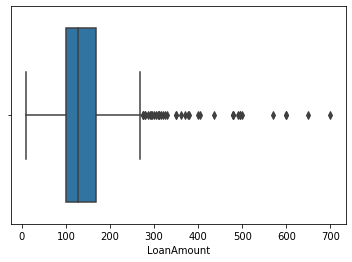

In [841]:
sns.boxplot(x=loan['LoanAmount'])

C:\Users\tanus\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tanus\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\tanus\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tanus\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


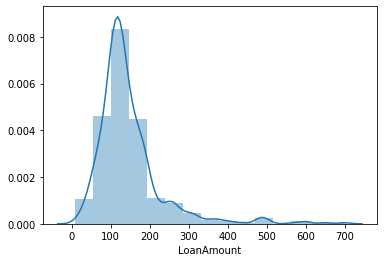

In [842]:
# loan['LoanAmount'].value_counts().plot(kind='bar')
sns.distplot(loan['LoanAmount'],hist=True,bins=15,kde=True,)

The distribution of LoanAmount is right skewed and has few outliers.

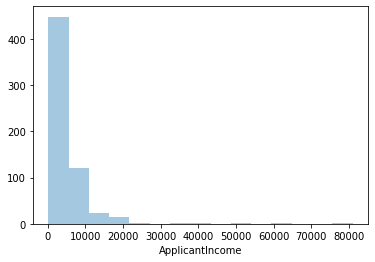

In [843]:
sns.distplot(loan['ApplicantIncome'],hist=True,bins=15,kde=False)

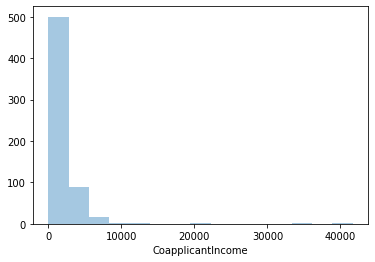

In [844]:
sns.distplot(loan['CoapplicantIncome'],hist=True,bins=15,kde=False)

Checking the number of **Outliers**:

In [845]:
l = loan[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [846]:
Q1 = l.quantile(0.25)
Q3 = l.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
dtype: float64


In [847]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


The above statistics indicate that around 75% of the people have an income of 5795 or below and upto 75% people take loan of max 168 . The max ApplicantIncome is 81000 and max LoanAmount is 700. It seems quite unreasonable for a person to take loan of <1000 considering his income is 81000. So these outliers may be erroneous or indicate a fraud activity.

In [848]:
l=l[((l >= (Q1 - 1.5 * IQR)) & (l <= (Q3 + 1.5 * IQR)))]
#l

Lets try to analyze the data of people with income > 6000

In [849]:
loan[loan['ApplicantIncome']>6000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
20,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,0
25,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,1
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,0
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,0
58,Male,Yes,1,Graduate,No,8080,2250.0,180.0,360.0,1.0,Urban,1
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,1
68,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,1
88,Male,No,0,Graduate,No,8566,0.0,210.0,360.0,1.0,Urban,1
91,Male,Yes,2,Graduate,No,6250,5654.0,188.0,180.0,1.0,Semiurban,1


People with 4 digit income took loans of <200 . The outliers in this case might indicate fraud detection hence I would like to keep it for now.

Let's visualize the data now.

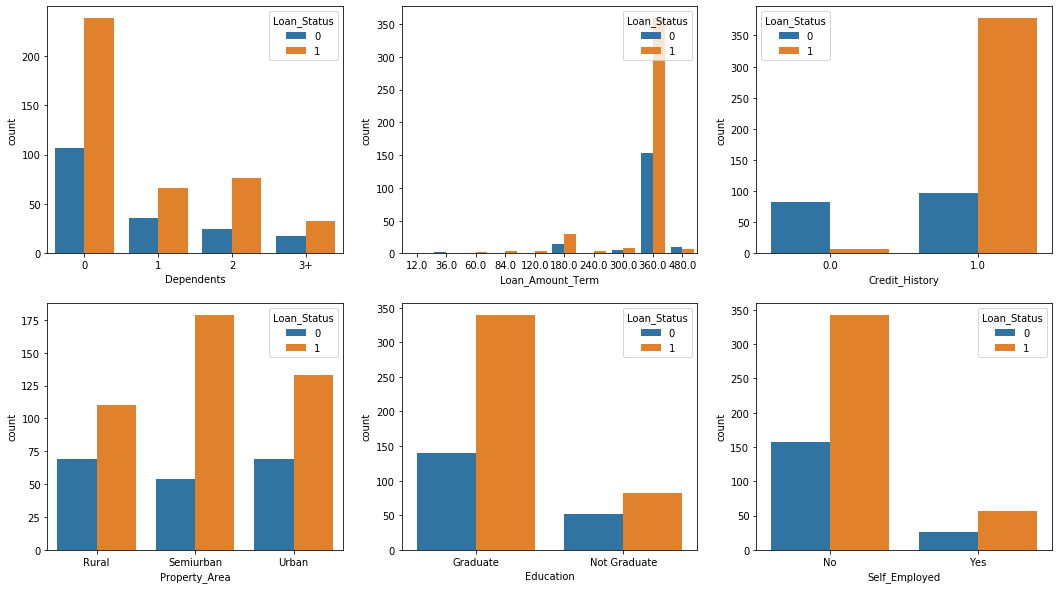

In [850]:
f,axes=plt.subplots(ncols=3,nrows=2,figsize=(18,10))

sns.countplot(x='Dependents',hue='Loan_Status',ax=axes[0][0],data=loan)
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',ax=axes[0][1],data=loan)
sns.countplot(x='Credit_History',hue='Loan_Status',ax=axes[0][2],data=loan)
sns.countplot(x='Property_Area',hue='Loan_Status',ax=axes[1][0],data=loan)
sns.countplot(x='Education',hue='Loan_Status',ax=axes[1][1],data=loan)
sns.countplot(x='Self_Employed',hue='Loan_Status',ax=axes[1][2],data=loan)

Based on the above visualizations we see that more loans are approved for people holding properties in urban or semiurban area. Also being a Graduate also increases the chances of getting the loan approved. The most significant factors seems to be the credit history of the user. People with 0 credit history which means whose credit history guidelines are not met are not approved of the loan and most of the people whose credit history meets guidelines gets their loans approved.

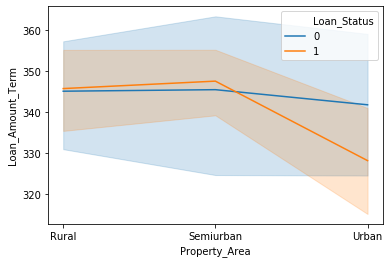

In [851]:
sns.lineplot('Property_Area','Loan_Amount_Term',hue='Loan_Status',data=loan)
plt.show()

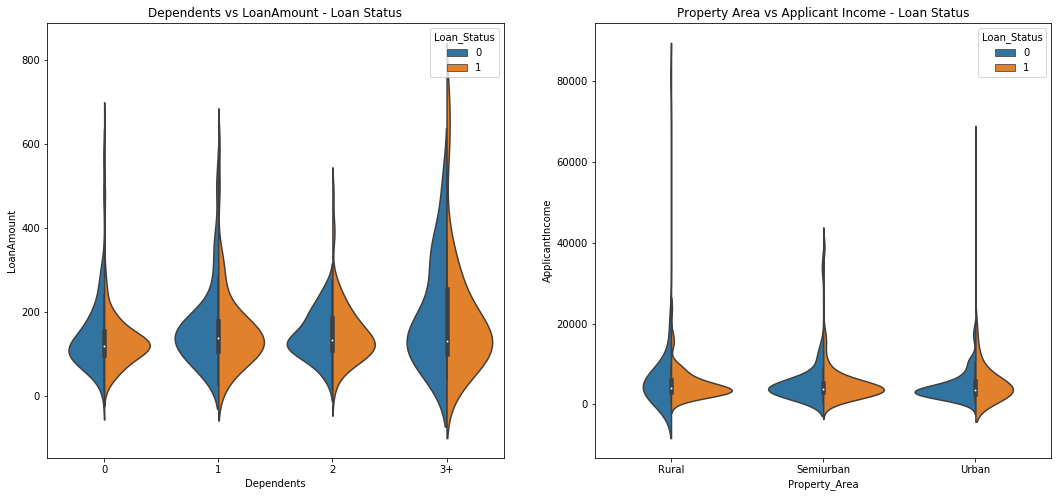

In [852]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Dependents","LoanAmount", hue="Loan_Status", data=loan,split=True,ax=ax[0])
ax[0].set_title('Dependents vs LoanAmount - Loan Status')
# ax[0].set_yticks(range(0,110,10))
sns.violinplot("Property_Area","ApplicantIncome", hue="Loan_Status", data=loan,split=True,ax=ax[1])
ax[1].set_title('Property Area vs Applicant Income - Loan Status')
# ax[1].set_yticks(range(0,110,10))
plt.show()

The distribution of dependents vs loan amount is similar across dependents band. The distribution is different across property type band.

In [853]:
loan['totalincome']=loan['ApplicantIncome']+loan['CoapplicantIncome']

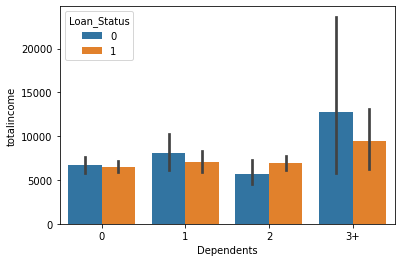

In [854]:
sns.barplot(x="Dependents", y="totalincome", hue="Loan_Status", data=loan)

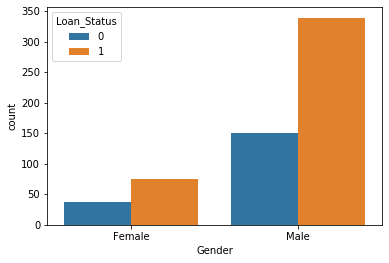

In [855]:
sns.countplot(x="Gender", hue="Loan_Status", data=loan)

No significant difference between approval ratio of female and male loans. More male applied for loans hence more male loans are approved as visible in the plot above.

In [856]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
totalincome           0
dtype: int64

### Handling Missing data

The categories Gender, Self_Employed and Dependents can be imputed with 0 as we do not have information about it. This can be done while encoding these categorical variables

In [857]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Gender               601 non-null category
Married              611 non-null category
Dependents           599 non-null object
Education            614 non-null category
Self_Employed        582 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null category
Loan_Status          614 non-null int64
totalincome          614 non-null float64
dtypes: category(5), float64(5), int64(2), object(1)
memory usage: 66.6+ KB


In [858]:
Gender = pd.get_dummies(loan['Gender'], drop_first=True)
Married = pd.get_dummies(loan['Married'], prefix='married_',drop_first=True)
Education = pd.get_dummies(loan['Education'], drop_first=True)
Self_Employed = pd.get_dummies(loan['Self_Employed'],prefix='seld_employed_',drop_first=True)
Property_Area = pd.get_dummies(loan['Property_Area'], drop_first=True)
Dependents= pd.get_dummies(loan['Dependents'],prefix='child_',drop_first=True)

In [859]:
loan =pd.concat([loan,Gender,Married,Education, Self_Employed,Property_Area,Dependents],axis=1)

In [860]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,totalincome,Male,married__Yes,Not Graduate,seld_employed__Yes,Semiurban,Urban,child__1,child__2,child__3+
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,...,5849.0,1,0,0,0,0,1,0,0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,6091.0,1,1,0,0,0,0,1,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,3000.0,1,1,0,1,0,1,0,0,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,4941.0,1,1,1,0,0,1,0,0,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,6000.0,1,0,0,0,0,1,0,0,0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,...,9613.0,1,1,0,1,0,1,0,1,0
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,...,3849.0,1,1,1,0,0,1,0,0,0
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,...,5540.0,1,1,0,0,1,0,0,0,1
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,...,5532.0,1,1,0,0,0,1,0,1,0
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,...,23809.0,1,1,0,0,1,0,1,0,0


In [861]:
y = loan['Loan_Status']


In [862]:
loan.drop(columns='Loan_Status',inplace=True)

In [863]:
loan.drop(columns='totalincome',inplace=True)

In [864]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Male',
       'married__Yes', 'Not Graduate', 'seld_employed__Yes', 'Semiurban',
       'Urban', 'child__1', 'child__2', 'child__3+'],
      dtype='object')

In [865]:
loan.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],inplace=True)

In [866]:
loan.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Male', 'married__Yes',
       'Not Graduate', 'seld_employed__Yes', 'Semiurban', 'Urban', 'child__1',
       'child__2', 'child__3+'],
      dtype='object')

In [867]:
loan.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Male                   0
married__Yes           0
Not Graduate           0
seld_employed__Yes     0
Semiurban              0
Urban                  0
child__1               0
child__2               0
child__3+              0
dtype: int64

Filling the LoanAmount, Loan_Amount_Term , Credit_History with Mean of the columns

In [868]:
loan= loan.fillna(loan.mean())

In [869]:
loan.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Male                  0
married__Yes          0
Not Graduate          0
seld_employed__Yes    0
Semiurban             0
Urban                 0
child__1              0
child__2              0
child__3+             0
dtype: int64

In [870]:
loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,married__Yes,Not Graduate,seld_employed__Yes,Semiurban,Urban,child__1,child__2,child__3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,0,0,0


Lets create a preprocessing function that we can use to clean the data in the test dataset.

In [871]:
def preprocessing(loan):
    loan['Gender'] = loan['Gender'].astype('category')
    loan['Married'] = loan['Married'].astype('category')
    loan['Education'] = loan['Education'].astype('category')
    loan['Self_Employed'] = loan['Self_Employed'].astype('category')
    loan['Property_Area'] = loan['Property_Area'].astype('category')
    loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('float64')
    loan.drop(columns='Loan_ID',inplace=True)

    Gender = pd.get_dummies(loan['Gender'], drop_first=True)
    Married = pd.get_dummies(loan['Married'], prefix='married_',drop_first=True)
    Education = pd.get_dummies(loan['Education'], drop_first=True)
    Self_Employed = pd.get_dummies(loan['Self_Employed'],prefix='seld_employed_',drop_first=True)
    Property_Area = pd.get_dummies(loan['Property_Area'], drop_first=True)
    Dependents= pd.get_dummies(loan['Dependents'],prefix='child_',drop_first=True)

    loan =pd.concat([loan,Gender,Married,Education, Self_Employed,Property_Area,Dependents],axis=1)

    loan.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],inplace=True)

    loan= loan.fillna(loan.mean())

    return loan

### Modeling

It is a classification problem as we want to predict whether loan will be approved for a person or not based on the parameters: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term , Credit_History , Gender, Married, Graduate, Property_Type.
We try three approaches to check the prediction accuracy. 

In [872]:
X = loan
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,married__Yes,Not Graduate,seld_employed__Yes,Semiurban,Urban,child__1,child__2,child__3+
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,0,0,0


In [873]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [874]:
x_test.shape

(185, 14)

In [875]:
scaler = StandardScaler().fit(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

1) Decision Tree Classifier

In [882]:
clf = DecisionTreeClassifier(min_samples_split=3)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       139
           1       1.00      0.99      1.00       290

    accuracy                           1.00       429
   macro avg       0.99      1.00      0.99       429
weighted avg       1.00      1.00      1.00       429

Training accuracy: 0.995


In [883]:
pred = clf.predict(x_test)
print('Test set Report\n {}'.format(classification_report(y_test,pred)))
print('Test set accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test,pred)))

Test set Report
               precision    recall  f1-score   support

           0       0.59      0.49      0.54        53
           1       0.81      0.86      0.84       132

    accuracy                           0.76       185
   macro avg       0.70      0.68      0.69       185
weighted avg       0.75      0.76      0.75       185

Test set accuracy: 0.757
AUC: 0.677


In [884]:
clf.feature_importances_

array([0.2276145 , 0.13266462, 0.17520578, 0.02731218, 0.32946051,
       0.02725107, 0.00938272, 0.0170824 , 0.00878489, 0.02508942,
       0.        , 0.01037282, 0.00977909, 0.        ])

2) Random Forest Classifier

In [885]:
clf1 = RandomForestClassifier(n_estimators=300)
clf1.fit(x_train,y_train)
pred = clf1.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       290

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Training accuracy: 1.000


In [886]:
pred = clf1.predict(x_test)
print('Test set Report\n {}'.format(classification_report(y_test,pred)))
print('Test set accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test,pred)))

Test set Report
               precision    recall  f1-score   support

           0       0.85      0.42      0.56        53
           1       0.81      0.97      0.88       132

    accuracy                           0.81       185
   macro avg       0.83      0.69      0.72       185
weighted avg       0.82      0.81      0.79       185

Test set accuracy: 0.811
AUC: 0.692


3) Support Vector Classifier

In [887]:
clf1 = SVC(C=500)
clf1.fit(x_train,y_train)
pred = clf1.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       139
           1       0.95      1.00      0.97       290

    accuracy                           0.96       429
   macro avg       0.97      0.94      0.96       429
weighted avg       0.96      0.96      0.96       429

Training accuracy: 0.963


C:\Users\tanus\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [889]:
pred = clf1.predict(x_test)
print('Test set Report\n {}'.format(classification_report(y_test,pred)))
print('Test set accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test,pred)))

Test set Report
               precision    recall  f1-score   support

           0       0.50      0.42      0.45        53
           1       0.78      0.83      0.81       132

    accuracy                           0.71       185
   macro avg       0.64      0.62      0.63       185
weighted avg       0.70      0.71      0.70       185

Test set accuracy: 0.714
AUC: 0.624


Random Forest Classifier gives the best test AUC results so far. Lets try to hypertune the parameters using RandomSearchGrid CV

In [890]:
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#max_features number of features to consider at each split
max_feat = ['auto','sqrt','log2']
#max_depth - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all 
#leaves contain less than min_samples_split samples.
max_depth = [int(x) for x in np.linspace(5, 30, num = 10)]
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_feat,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [891]:
pprint.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [892]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished
C:\Users\tanus\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [893]:
rf_random.best_params_

{'n_estimators': 2000, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}

In [894]:
clf = RandomForestClassifier(n_estimators=2000,min_samples_leaf=4,max_features='sqrt',max_depth=30,bootstrap=True)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       0.92      0.47      0.62       139
           1       0.79      0.98      0.88       290

    accuracy                           0.81       429
   macro avg       0.85      0.72      0.75       429
weighted avg       0.83      0.81      0.79       429

Training accuracy: 0.814


In [895]:
pred = clf.predict(x_test)
print('Test Report\n {}'.format(classification_report(y_test,pred)))
print('Test accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))

Test Report
               precision    recall  f1-score   support

           0       0.95      0.38      0.54        53
           1       0.80      0.99      0.89       132

    accuracy                           0.82       185
   macro avg       0.88      0.68      0.71       185
weighted avg       0.84      0.82      0.79       185

Test accuracy: 0.816


After tuning the parameters we received a train and test accuracy of 0.81 . Lets predict the output for the data provided in the challenge.

In [896]:
test_data=pd.read_csv('test_lAUu6dG.csv')

In [897]:
test_data=preprocessing(test_data)
scaler = StandardScaler().fit(test_data)
test_data = scaler.transform(test_data)

In [898]:
pred_test = clf.predict(test_data)

In [899]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [900]:
pred_test.shape

(367,)

In [901]:
df = pd.DataFrame(pred_test).T

In [902]:
df = df.T

In [903]:
df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [904]:
df.to_csv('output.csv')

Acheived a score of 0.77 for my submission!